# BIOS512 Final Project

Writer: Haoyu Xin

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
worldcups = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-11-29/worldcups.csv',
                    col_types = cols())
worldcup_matches = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-11-29/wcmatches.csv',
                       col_types = cols())

In [3]:
worldcups |> head()

year,host,winner,second,third,fourth,goals_scored,teams,games,attendance
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,434000
1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,395000
1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,483000
1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1337000
1954,Switzerland,West Germany,Hungary,Austria,Uruguay,140,16,26,943000
1958,Sweden,Brazil,Sweden,France,West Germany,126,16,35,868000


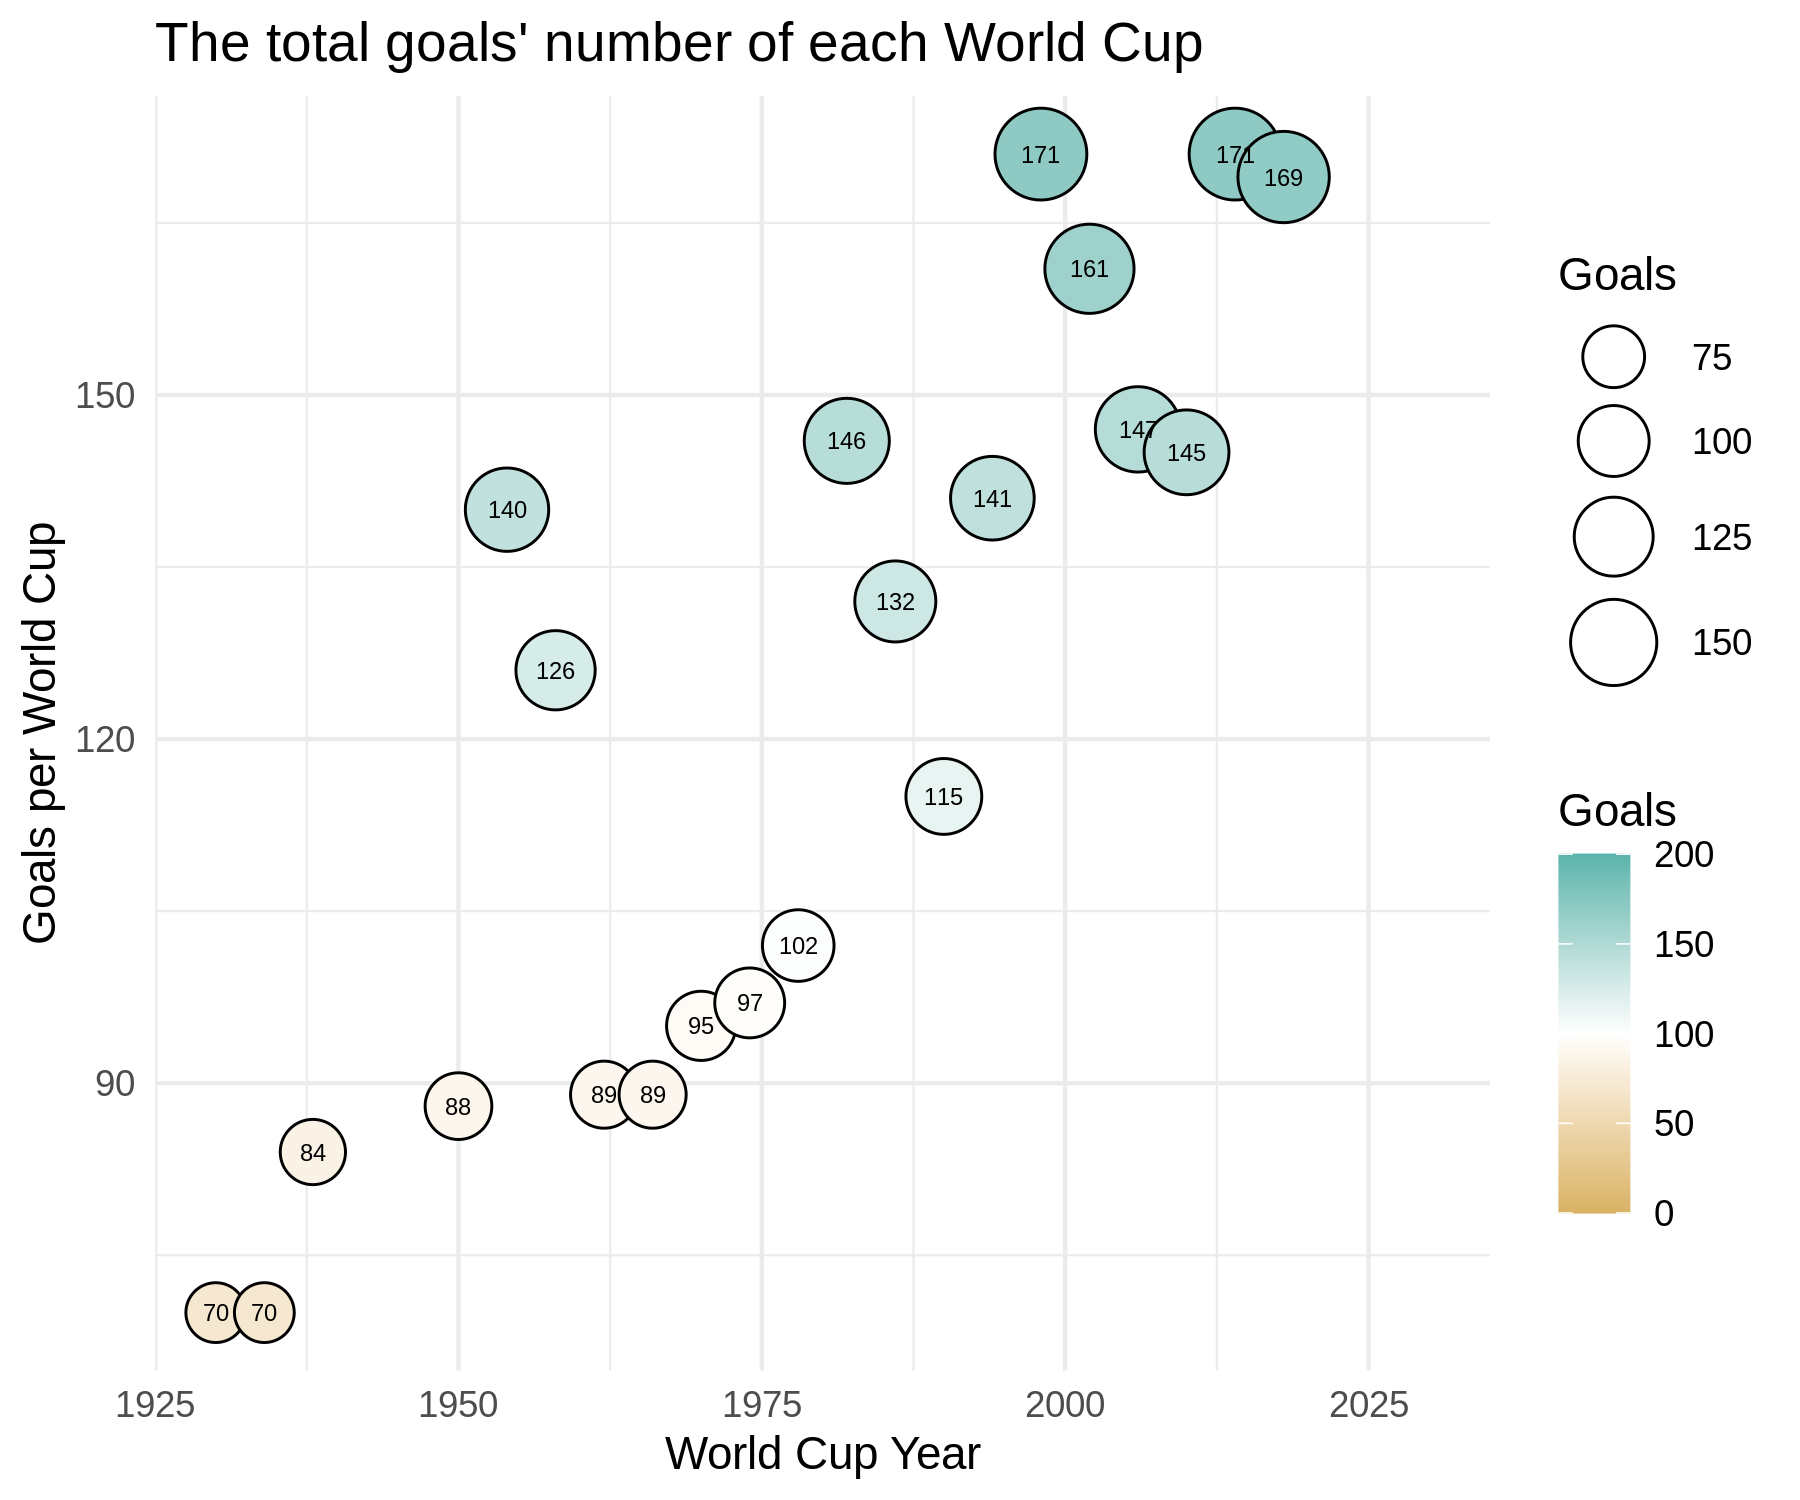

In [4]:
options(repr.plot.width = 6, repr.plot.height = 5)
p1 = ggplot(worldcups, aes(x = year, y = goals_scored)) + 
    geom_point(aes(fill = goals_scored, size = goals_scored), shape = 21) +
    scale_x_continuous(name="World Cup Year", limits=c(1930, 2030)) + 
    scale_y_continuous(name="Goals per World Cup") +
    labs(title = "The total goals' number of each World Cup", fill = "Goals", size = "Goals") +
    theme_minimal() + 
    scale_fill_gradient2(low = "#d8b365", high = "#5ab4ac", limits = c(0, 200), midpoint = 100) +
    scale_size_area(max_size = 10) +
    geom_text(aes(label=goals_scored), size = 2)   
p1

We can see from the plot that in general, the total number of goals scored in the World Cup is increasing over time. It may be because the techniques and tactics have developed more and more progressive over time and the style of soccer has become more open. Including with the development of various training and medical technology, the physical and technical level of players has also improved tremendously, so the total number of goals is basically in an incremental situation.
In some special points, because the 1982 World Cup changed from 16 to 24 teams and the format was changed, it led to a sudden increase in the number of goals scored. 1998 World Cup was the same, because the number of teams changed from 24 to 32 in that year, so the number of goals scored increased a lot, and then fell back, and then increased year by year.

In [5]:
worldcup_matches |> head()

year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>
1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,NA,France,Mexico,1930-07-13,Jul,Sunday
1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,NA,United States,Belgium,1930-07-13,Jul,Sunday
1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,NA,Yugoslavia,Brazil,1930-07-14,Jul,Monday
1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,NA,Romania,Peru,1930-07-14,Jul,Monday
1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,NA,Argentina,France,1930-07-15,Jul,Tuesday
1930,Uruguay,Montevideo,Group 1,Chile,Mexico,3,0,H,NA,Chile,Mexico,1930-07-16,Jul,Wednesday


In [6]:
wc_final = worldcup_matches |> 
    filter(stage == "Final") |> 
    mutate(total_goals = home_score + away_score)
wc_final |> head()

year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek,total_goals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>
1930,Uruguay,Montevideo,Final,Uruguay,Argentina,4,2,H,NA,Uruguay,Argentina,1930-07-30,Jul,Wednesday,6
1934,Italy,Rome,Final,Italy,Czechoslovakia,2,1,H,Italy won in AET,Italy,Czechoslovakia,1934-06-10,Jun,Sunday,3
1938,France,Colombes,Final,Hungary,Italy,2,4,A,NA,Italy,Hungary,1938-06-19,Jun,Sunday,6
1954,Switzerland,Berne,Final,West Germany,Hungary,3,2,H,NA,West Germany,Hungary,1954-07-04,Jul,Sunday,5
1958,Sweden,Solna,Final,Sweden,Brazil,2,5,A,NA,Brazil,Sweden,1958-06-29,Jun,Sunday,7
1962,Chile,Santiago,Final,Brazil,Czechoslovakia,3,1,H,NA,Brazil,Czechoslovakia,1962-06-17,Jun,Sunday,4


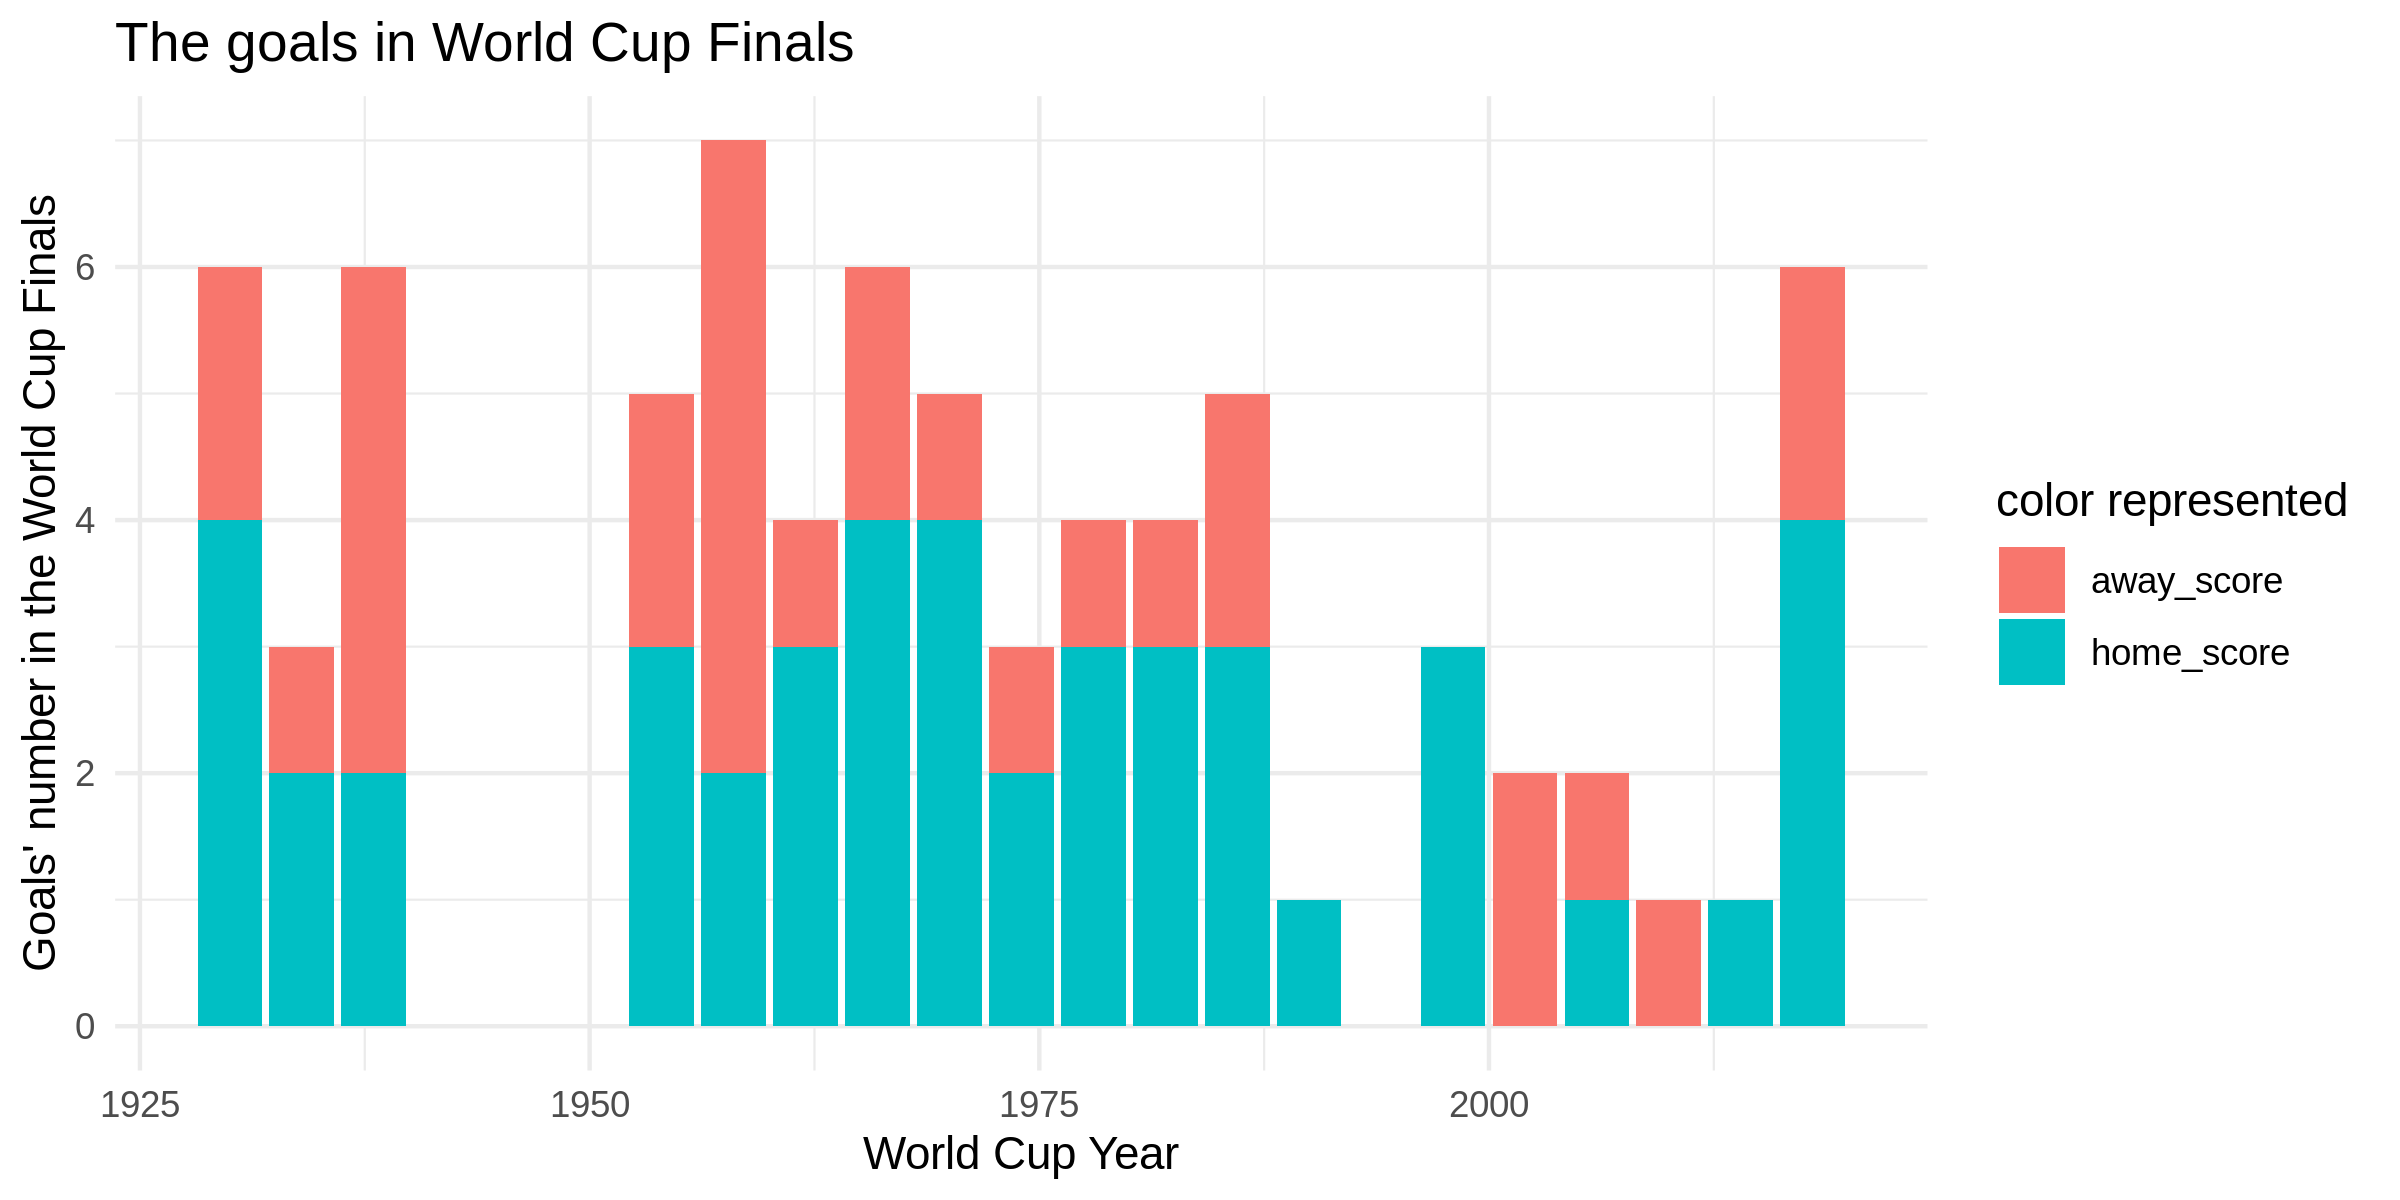

In [7]:
options(repr.plot.width = 8, repr.plot.height = 4)
final_goals = wc_final |>
    select(year, home_score, away_score) |>
    pivot_longer(cols = c(home_score:away_score), names_to = 'team', values_to = 'score')

p2 = ggplot(final_goals, aes(x = year, y = score, fill = team)) +
    geom_bar(position = "stack",stat = "identity") +
    scale_x_continuous(name="World Cup Year") + 
    scale_y_continuous(name="Goals' number in the World Cup Finals") +
    labs(title = "The goals in World Cup Finals", fill = "color represented") +
    theme_minimal()

p2

Although everyone feels that in the quadrennial World Cup, the teams that make it to the final should be more conservative, so there won't be a lot of goals in the final. From this plot we can learn that there are 8 games in World Cup finals the total number of goals scored more than 4. So the finalists may not be as conservative as we think. At the same time, even though the host city of the World Cup final is often not the country of the finalists, the probability of the home team winning the final is higher than the away team.

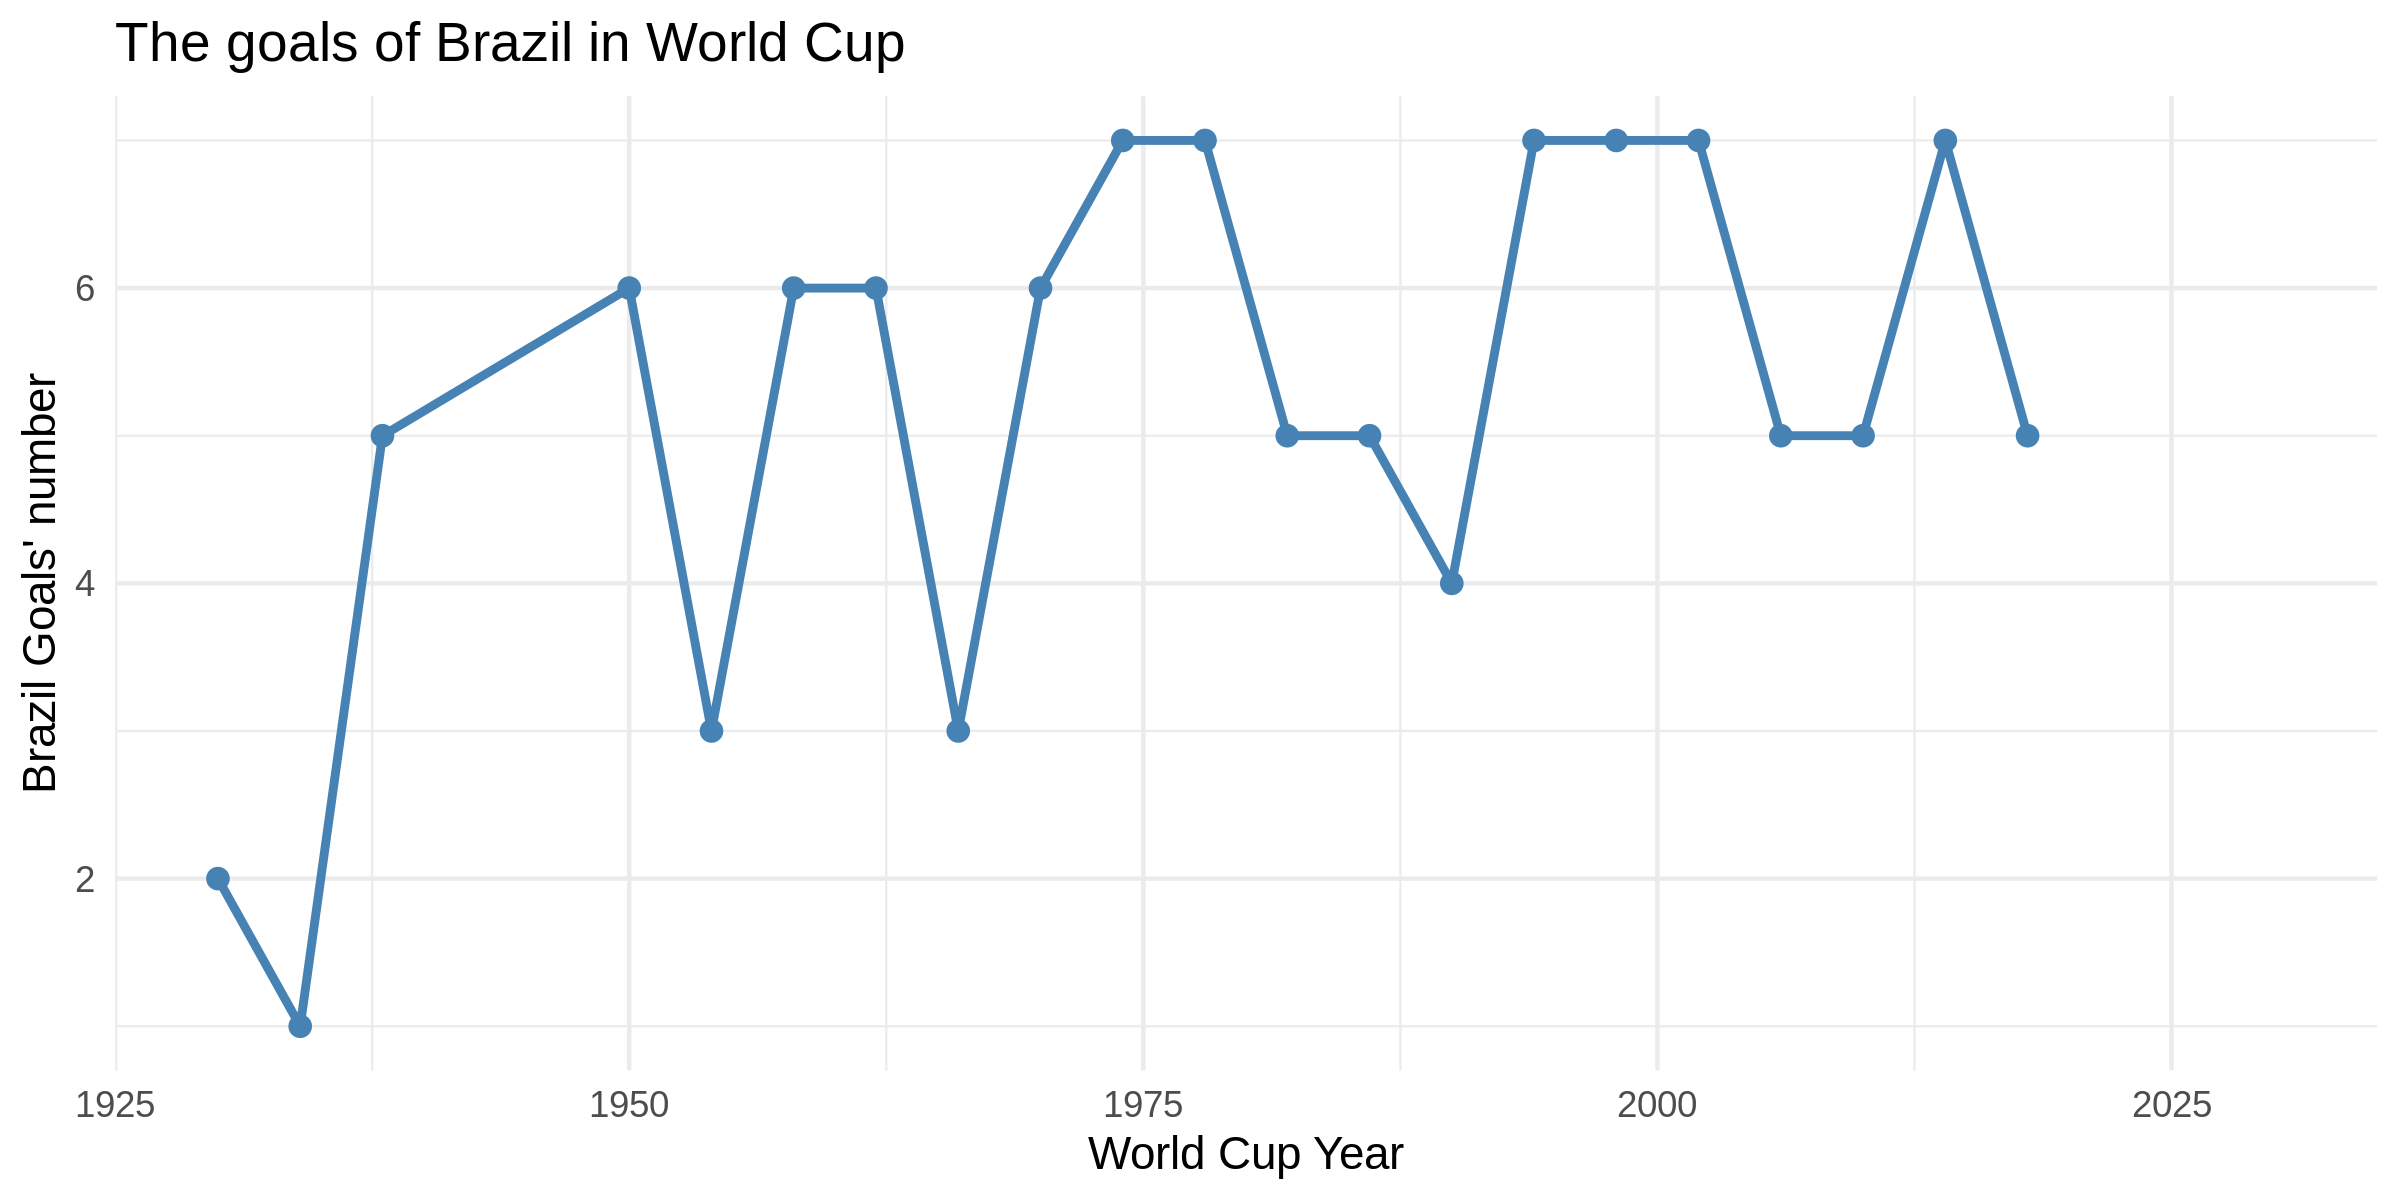

In [8]:
options(repr.plot.width = 8, repr.plot.height = 4)
brazil_goals = worldcup_matches |> 
    select(year, home_team, away_team, home_score, away_score) |>
    pivot_longer(cols = c(home_score:away_score), names_to = 'team', values_to = 'score') |>
    filter((home_team == "Brazil" & team == "home_score") | (away_team == "Brazil" & team == "away_score")) |> 
    group_by(year) |>
    summarize(goal_num = n())
#brazil_goals

p3 = ggplot(brazil_goals, aes(x = year, y =goal_num)) +  
    geom_point(size = 2, color = 'steelblue') + 
    geom_line(linewidth = 1, color = 'steelblue') +
    scale_x_continuous(name="World Cup Year", limits=c(1930, 2030)) + 
    scale_y_continuous(name="Brazil Goals' number") +
    labs(title = "The goals of Brazil in World Cup") +
    theme_minimal()
    
p3

Brazil, as a soccer kingdom, has won five World Cups in its history. We can also tell from the plot that Brazil has scored relatively more goals in each World Cup, while in the World Cups where Brazil has scored more goals, they have been able to get good positions.